In [1]:
import pandas as pd
import numpy as np
import pandas as pandas_pd
import os
import time

In [2]:
from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [3]:
%cd gdrive/MyDrive

/content/gdrive/MyDrive


**Reading a file using Pandas**

In [4]:
data = pd.read_csv('LI-Medium_Trans.csv')

In [25]:
data.head()

,Timestamp,From Bank,Account,To Bank,Account.1,Amount Received,Receiving Currency,Amount Paid,Payment Currency,Payment Format,Is Laundering
0,2022/09/01 00:15,20,800104D70,20,800104D70,8095.07,US Dollar,8095.07,US Dollar,Reinvestment,0
1,2022/09/01 00:18,3196,800107150,3196,800107150,7739.29,US Dollar,7739.29,US Dollar,Reinvestment,0
2,2022/09/01 00:23,1208,80010E430,1208,80010E430,2654.22,US Dollar,2654.22,US Dollar,Reinvestment,0
3,2022/09/01 00:19,3203,80010EA80,3203,80010EA80,13284.41,US Dollar,13284.41,US Dollar,Reinvestment,0
4,2022/09/01 00:27,20,800104D20,20,800104D20,9.72,US Dollar,9.72,US Dollar,Reinvestment,0


In [9]:
results_loading = []
start_time = time.time()
%time  data = pd.read_csv('LI-Medium_Trans.csv')
results_loading.append({"lib":"sec_pd","time":float("{}".format(time.time() - start_time))})
sec_pd=print("--- %s seconds ---" % (time.time() - start_time))

CPU times: user 1min 2s, sys: 20.3 s, total: 1min 22s
Wall time: 1min 41s
--- 101.82704877853394 seconds ---


In [4]:
import pandas as pandas_pd
results_loading = []
start_time = time.time()
%time  data = pandas_pd.read_csv('LI-Medium_Trans.csv')
results_loading.append({"lib":"sec_pandas","time":float("{}".format(time.time() - start_time))})
sec_pandas=print("--- %s seconds ---" % (time.time() - start_time))

CPU times: user 1min 4s, sys: 22.4 s, total: 1min 26s
Wall time: 1min 51s
--- 111.75785636901855 seconds ---


In [10]:
data.shape

(31251483, 11)

**Reading a file using Ray**


In [24]:
!pip install -U "ray[default]"

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import ray
ray.shutdown()
ray.init()
start_time = time.time()
data1=pd.read_csv('LI-Medium_Trans.csv')
sec_ray=print("--- %s seconds ---" % (time.time() - start_time))
results_loading.append({"lib":"sec_ray","time":float("{}".format(time.time() - start_time))})

**Reading a file using Modin Ray**

In [11]:
!pip install modin[ray]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 22.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.2/56.2 MB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.6/149.6 kB 16.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 64.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 67.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.4/201.4 kB 24.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 82.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.9/97.9 kB 12.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.2/128.2 kB 17.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
import os
os.environ["MODIN_ENGINE"] = "ray"  # Modin will use Ray
import ray
import modin.pandas as ray_pd
start_time = time.time()
%time  m_ray_data = ray_pd.read_csv("LI-Medium_Trans.csv")
sec_ray_modin=print("--- %s seconds ---" % (time.time() - start_time))
results_loading.append({"lib":"sec_ray_modin","time":float("{}".format(time.time() - start_time))})

**Reading a file using Dask**

In [ ]:
import dask.dataframe as dd
start_time = time.time()
data3 = dd.read_csv('LI-Medium_Trans.csv')
sec_dask=print("--- %s seconds ---" % (time.time() - start_time))
results_loading.append({"lib":"sec_dask","time":float("{}".format(time.time() - start_time))})

--- 0.1789562702178955 seconds ---


In [ ]:
data3.npartitions

59

**Reading a file using Modin Dask**

In [5]:
!pip install modin[dask] 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 17.7 MB/s eta 0:00:00


In [ ]:
os.environ["MODIN_ENGINE"] = "dask"  # Modin will use Dask

from distributed import Client
client = Client(memory_limit='4GB')
import modin.pandas as dask_pd
start_time = time.time()
%time  mdask_df = dask_pd.read_csv("LI-Medium_Trans.csv")
sec_dask_modin=print("--- %s seconds ---" % (time.time() - start_time))
results_loading.append({"lib":"sec_dask_modin","time":float("{}".format(time.time() - start_time))})

**Reading a file using Modin**

In [16]:
!pip install modin[all]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.3/104.3 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.9/68.9 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.6/135.6 kB 14.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 55.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.0/127.0 kB 14.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 36.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.8/79.8 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.9/121.9 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 27.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.9/84.9 kB 5.1 MB/s eta 0:00:00


In [ ]:
import modin.pandas as pd
start_time = time.time()
data4 = pd.read_csv('LI-Medium_Trans.csv')
sec_modin=print("--- %s seconds ---" % (time.time() - start_time))
results_loading.append({"lib":"sec_modin","time":float("{}".format(time.time() - start_time))})

In [26]:
results_loading 

[{'lib': 'sec_pd', 'time': 101.82694101333618},
 {'lib': 'sec_ray_modin', 'time': 230.8687207698822},
 {'lib': 'sec_dask_modin', 'time': 271.97485733032227},
 {'lib': 'sec_dask_modin', 'time': 7.645563840866089}]

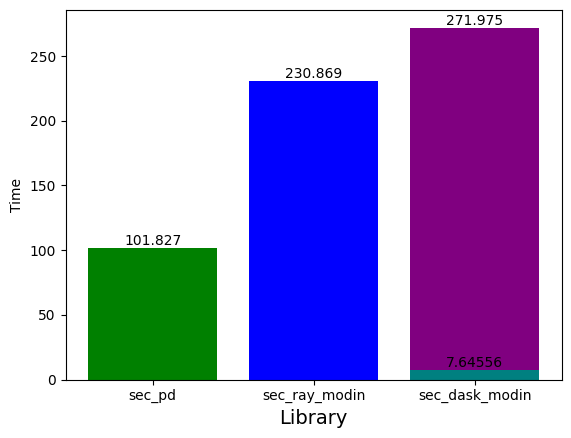

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
results_loading
#colors = ['green','blue','purple','brown','teal']
colors = ['green','blue','purple','teal']
df = pd.DataFrame(results_loading)
ax=plt.bar(df['lib'], df['time'], color=colors)
plt.bar_label(ax)
plt.xlabel('Library', fontsize=14)
plt.ylabel('Time', fontsize=10)
plt.show()

In [6]:
len(data.index)

31251483

In [7]:
len(data.columns)

11

In [8]:
# remove special character
data.columns=data.columns.str.replace('[#,@,&]','')

<ipython-input-8-fc84dcb6f7d6>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  data.columns=data.columns.str.replace('[#,@,&]','')


In [10]:
data.head()

,Timestamp,From Bank,Account,To Bank,Account.1,Amount Received,Receiving Currency,Amount Paid,Payment Currency,Payment Format,Is Laundering
0,2022/09/01 00:15,20,800104D70,20,800104D70,8095.07,US Dollar,8095.07,US Dollar,Reinvestment,0
1,2022/09/01 00:18,3196,800107150,3196,800107150,7739.29,US Dollar,7739.29,US Dollar,Reinvestment,0
2,2022/09/01 00:23,1208,80010E430,1208,80010E430,2654.22,US Dollar,2654.22,US Dollar,Reinvestment,0
3,2022/09/01 00:19,3203,80010EA80,3203,80010EA80,13284.41,US Dollar,13284.41,US Dollar,Reinvestment,0
4,2022/09/01 00:27,20,800104D20,20,800104D20,9.72,US Dollar,9.72,US Dollar,Reinvestment,0


**Validation**

*create utility file*

In [4]:
import yaml
import logging
import os
import subprocess
import yaml
import pandas as pd
import datetime 
import gc
import re

In [5]:
!pip install virtualenv -p python3


Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [options] -r <requirements file> [package-index-options] ...
  pip3 install [options] [-e] <vcs project url> ...
  pip3 install [options] [-e] <local project path> ...
  pip3 install [options] <archive url/path> ...

no such option: -p


In [6]:
!pip install pyyaml

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
%%writefile utility.py
import logging
import os
import subprocess
import yaml
import pandas as pd
import datetime 
import gc
import re

def read_config_file(filepath):
    with open(filepath, 'r') as stream:
        try:
            return yaml.safe_load(stream)
        except yaml.YAMLError as exc:
            logging.error(exc)

def replacer(string, char):
    pattern = char + '{2,}'
    string = re.sub(pattern, char, string) 
    return string

def col_header_val(df,table_config):
    '''
    replace whitespaces in the column
    and standardized column names
    '''
    df.columns = df.columns.str.lower()
    df.columns = df.columns.str.replace('[^\w]','_',regex=True)
    df.columns = list(map(lambda x: x.strip('_'), list(df.columns)))
    df.columns = list(map(lambda x: replacer(x,'_'), list(df.columns)))
    expected_col = list(map(lambda x: x.lower(),  table_config['columns']))
    expected_col.sort()
    df.columns =list(map(lambda x: x.lower(), list(df.columns)))
    df = df.reindex(sorted(df.columns), axis=1)
    if len(df.columns) == len(expected_col) and list(expected_col)  == list(df.columns):
        print("column name and column length validation passed")
        return 1
    else:
        print("column name and column length validation failed")
        mismatched_columns_file = list(set(df.columns).difference(expected_col))
        print("Following File columns are not in the YAML file",mismatched_columns_file)
        missing_YAML_file = list(set(expected_col).difference(df.columns))
        print("Following YAML columns are not in the file uploaded",missing_YAML_file)
        logging.info(f'df columns: {df.columns}')
        logging.info(f'expected columns: {expected_col}')
        return 0

Overwriting utility.py


*write YAML file*

In [8]:
%%writefile file.yaml
file_type: csv
dataset_name: file
file_name: LI-Medium_Trans
table_name: edsurv
inbound_delimiter: ","
outbound_delimiter: "|"
skip_leading_rows: 1
columns: 
   - Timestamp
   - From Bank
   - Account
   - To Bank
   - Account.1
   - Amount Received
   - Receiving Currency
   - Amount Paid
   - Payment Currency
   - Payment Format
   - Is Laundering

Overwriting file.yaml


In [9]:
!pip install python-utils

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [10]:
# Reading config file
import utility as util
config_data = util.read_config_file("file.yaml")
config_data

{'file_type': 'csv',
 'dataset_name': 'file',
 'file_name': 'LI-Medium_Trans',
 'table_name': 'edsurv',
 'inbound_delimiter': ',',
 'outbound_delimiter': '|',
 'skip_leading_rows': 1,
 'columns': ['Timestamp',
  'From Bank',
  'Account',
  'To Bank',
  'Account.1',
  'Amount Received',
  'Receiving Currency',
  'Amount Paid',
  'Payment Currency',
  'Payment Format',
  'Is Laundering']}

In [11]:
config_data['file_type']

'csv'

In [12]:
config_data['inbound_delimiter']

','

In [15]:
#normal reading process of the file
df_first=pd.read_csv('Review.csv',delimiter=',')
df_first.head()

FileNotFoundError: ignored

In [13]:
#read file using config file
file_type = config_data['file_type']
source_file = "/content/gdrive/MyDrive/" + config_data['file_name'] + f'.{file_type}'
df=pd.read_csv(source_file,config_data['inbound_delimiter'])

<ipython-input-13-deccb1bd146c>:4: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  df=pd.read_csv(source_file,config_data['inbound_delimiter'])


In [14]:
#validate the header of the file
util.col_header_val(df,config_data)

column name and column length validation failed
Following File columns are not in the YAML file ['account_1', 'is_laundering', 'from_bank', 'to_bank', 'payment_format', 'receiving_currency', 'amount_paid', 'amount_received', 'payment_currency']
Following YAML columns are not in the file uploaded ['from bank', 'payment format', 'amount paid', 'receiving currency', 'amount received', 'payment currency', 'account.1', 'is laundering', 'to bank']


0

In [15]:
print("columns of files are:" ,df.columns)
print("columns of YAML are:" ,config_data['columns'])

columns of files are: Index(['timestamp', 'from_bank', 'account', 'to_bank', 'account_1',
       'amount_received', 'receiving_currency', 'amount_paid',
       'payment_currency', 'payment_format', 'is_laundering'],
      dtype='object')
columns of YAML are: ['Timestamp', 'From Bank', 'Account', 'To Bank', 'Account.1', 'Amount Received', 'Receiving Currency', 'Amount Paid', 'Payment Currency', 'Payment Format', 'Is Laundering']


In [16]:
if util.col_header_val(df,config_data)==0:
    print("validation failed")
else:
    print("col validation passed")

column name and column length validation failed
Following File columns are not in the YAML file ['account_1', 'is_laundering', 'from_bank', 'to_bank', 'payment_format', 'receiving_currency', 'amount_paid', 'amount_received', 'payment_currency']
Following YAML columns are not in the file uploaded ['from bank', 'payment format', 'amount paid', 'receiving currency', 'amount received', 'payment currency', 'account.1', 'is laundering', 'to bank']
validation failed


In [26]:
import csv
import gzip

from dask import dataframe as dd
df = dd.read_csv('/content/gdrive/MyDrive/LI-Medium_Trans.csv', delimiter="\t")

# Write csv in gz format in pipe separated text file (|)
df.to_csv('LI-Medium_Trans.csv.gz',
          sep='|',
          header=True,
          index=False,
          quoting=csv.QUOTE_ALL,
          compression='gzip',
          quotechar='"',
          doublequote=True,
          line_terminator='\t')

/usr/local/lib/python3.10/dist-packages/dask/dataframe/io/csv.py:788: FutureWarning: the 'line_terminator'' keyword is deprecated, use 'lineterminator' instead.
  df.to_csv(f, **kwargs)
/usr/local/lib/python3.10/dist-packages/dask/dataframe/io/csv.py:788: FutureWarning: the 'line_terminator'' keyword is deprecated, use 'lineterminator' instead.
  df.to_csv(f, **kwargs)
/usr/local/lib/python3.10/dist-packages/dask/dataframe/io/csv.py:788: FutureWarning: the 'line_terminator'' keyword is deprecated, use 'lineterminator' instead.
  df.to_csv(f, **kwargs)
/usr/local/lib/python3.10/dist-packages/dask/dataframe/io/csv.py:788: FutureWarning: the 'line_terminator'' keyword is deprecated, use 'lineterminator' instead.
  df.to_csv(f, **kwargs)
/usr/local/lib/python3.10/dist-packages/dask/dataframe/io/csv.py:788: FutureWarning: the 'line_terminator'' keyword is deprecated, use 'lineterminator' instead.
  df.to_csv(f, **kwargs)
/usr/local/lib/python3.10/dist-packages/dask/dataframe/io/csv.py:788: 

['/content/gdrive/MyDrive/LI-Medium_Trans.csv.gz/00.part',
 '/content/gdrive/MyDrive/LI-Medium_Trans.csv.gz/01.part',
 '/content/gdrive/MyDrive/LI-Medium_Trans.csv.gz/02.part',
 '/content/gdrive/MyDrive/LI-Medium_Trans.csv.gz/03.part',
 '/content/gdrive/MyDrive/LI-Medium_Trans.csv.gz/04.part',
 '/content/gdrive/MyDrive/LI-Medium_Trans.csv.gz/05.part',
 '/content/gdrive/MyDrive/LI-Medium_Trans.csv.gz/06.part',
 '/content/gdrive/MyDrive/LI-Medium_Trans.csv.gz/07.part',
 '/content/gdrive/MyDrive/LI-Medium_Trans.csv.gz/08.part',
 '/content/gdrive/MyDrive/LI-Medium_Trans.csv.gz/09.part',
 '/content/gdrive/MyDrive/LI-Medium_Trans.csv.gz/10.part',
 '/content/gdrive/MyDrive/LI-Medium_Trans.csv.gz/11.part',
 '/content/gdrive/MyDrive/LI-Medium_Trans.csv.gz/12.part',
 '/content/gdrive/MyDrive/LI-Medium_Trans.csv.gz/13.part',
 '/content/gdrive/MyDrive/LI-Medium_Trans.csv.gz/14.part',
 '/content/gdrive/MyDrive/LI-Medium_Trans.csv.gz/15.part',
 '/content/gdrive/MyDrive/LI-Medium_Trans.csv.gz/16.part

In [27]:
# Get file summary
file_size = os.path.getsize('LI-Medium_Trans.csv.gz')
num_rows = len(df)
num_cols = len(df.columns)

# Print file summary
print("File summary:")
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_cols}")
print(f"File size: {file_size} bytes")

File summary:
Number of rows: 31251483
Number of columns: 1
File size: 4096 bytes
